In [2]:
# SPARK SESSIONS

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, desc
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql.functions import *
from pyspark.sql.types import *
from delta.tables import *
from pyspark.sql.functions import col, dayofmonth, month, year, date_format
import findspark
import zipfile
import os
from pyspark.sql.functions import when, lit, col, current_timestamp, input_file_name
import pandas as pd
import requests

In [20]:
findspark.init()
spark = SparkSession.builder.appName("sparksql").getOrCreate()
%load_ext sparksql_magic
%config SparkSql.max_num_rows=20

The sparksql_magic extension is already loaded. To reload it, use:
  %reload_ext sparksql_magic


/home/radek/git_projekty/sparkTraining/.venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3493: UserWarning: Config option `max_num_rows` not recognized by `SparkSql`.
  if await self.run_code(code, result, async_=asy):


In [14]:
kursy_walut_xml = "https://static.nbp.pl/dane/kursy/xml/a045z240304.xml"  # https://static.nbp.pl/dane/kursy/Archiwum/archiwum_tab_a_2024.csv

In [15]:
kursy_walut_csv = {
    "2020": "https://static.nbp.pl/dane/kursy/Archiwum/archiwum_tab_a_2020.csv",
    "2021": "https://static.nbp.pl/dane/kursy/Archiwum/archiwum_tab_a_2021.csv",
    "2022": "https://static.nbp.pl/dane/kursy/Archiwum/archiwum_tab_a_2022.csv",
    "2023": "https://static.nbp.pl/dane/kursy/Archiwum/archiwum_tab_a_2023.csv",
    "2024": "https://static.nbp.pl/dane/kursy/Archiwum/archiwum_tab_a_2024.csv",
}

In [16]:
url = kursy_walut_csv["2024"]
s = requests.get(url).content

In [17]:
# pd_kursy = pd.read_csv(url, encoding='cp1250'   )
kursy = pd.read_csv(url, sep=";", encoding="cp1250", index_col="data")

In [18]:
pd_kursy = pd.read_csv(
    kursy_walut_csv["2024"], sep=";", encoding="cp1250", index_col="data"
)

In [4]:
unzip_files = [
    "2015.zip",
    "2016.zip",
    "2017.zip",
    "2019.zip",
    "detroit_911_calls.zip",
    "malaysia_covid_cases.zip",
]
state_path = 'DATA/MATURY'
unzip_files2 = [ item for item in os.listdir(state_path) if item.endswith('.zip')]

In [5]:
print( unzip_files2 )

['informatyka-2023-maj-matura-rozszerzona-zalaczniki.zip', 'informatyka-2023-maj-matura-stara-rozszerzona-zalaczniki.zip', 'informatyka-2020-kwiecien-probna-rozszerzona-zalaczniki.zip', 'informatyka-2022-maj-matura-rozszerzona-zalaczniki.zip', 'informatyka-2021-marzec-probna-rozszerzona-zalaczniki.zip', 'informatyka-2019-maj-matura-rozszerzona-zalaczniki.zip', 'informatyka-2020-operon-probna-rozszerzona-zalaczniki.zip', 'informatyka-2019-maj-matura-stara-rozszerzona-zalaczniki.zip']


In [7]:
def unzip_file(file_to_unzip):
    print(file_to_unzip.split("."))
    with zipfile.ZipFile(file_to_unzip, "r") as file:
        file.extractall(file_to_unzip.split(".")[0])

In [11]:
# for item in unzip_files2:
#     item = os.path.join(state_path, item )
#     print( item )
#     unzip_file( item )

DATA/MATURY/informatyka-2023-maj-matura-rozszerzona-zalaczniki.zip
['DATA/MATURY/informatyka-2023-maj-matura-rozszerzona-zalaczniki', 'zip']
DATA/MATURY/informatyka-2023-maj-matura-stara-rozszerzona-zalaczniki.zip
['DATA/MATURY/informatyka-2023-maj-matura-stara-rozszerzona-zalaczniki', 'zip']
DATA/MATURY/informatyka-2020-kwiecien-probna-rozszerzona-zalaczniki.zip
['DATA/MATURY/informatyka-2020-kwiecien-probna-rozszerzona-zalaczniki', 'zip']
DATA/MATURY/informatyka-2022-maj-matura-rozszerzona-zalaczniki.zip
['DATA/MATURY/informatyka-2022-maj-matura-rozszerzona-zalaczniki', 'zip']
DATA/MATURY/informatyka-2021-marzec-probna-rozszerzona-zalaczniki.zip
['DATA/MATURY/informatyka-2021-marzec-probna-rozszerzona-zalaczniki', 'zip']
DATA/MATURY/informatyka-2019-maj-matura-rozszerzona-zalaczniki.zip
['DATA/MATURY/informatyka-2019-maj-matura-rozszerzona-zalaczniki', 'zip']
DATA/MATURY/informatyka-2020-operon-probna-rozszerzona-zalaczniki.zip
['DATA/MATURY/informatyka-2020-operon-probna-rozszerzona

In [28]:
files_to_proceed = ['marki.txt','perfumy.txt','sklad.txt']
paths_to_proceed = ['DATA/MATURY/informatyka-2019-maj-matura-rozszerzona-zalaczniki/Dane_PR']

In [51]:
marki =  os.path.join(paths_to_proceed[0], files_to_proceed[0])
perfumy =  os.path.join(paths_to_proceed[0], files_to_proceed[1])
sklad =  os.path.join(paths_to_proceed[0], files_to_proceed[2])
print( marki )
print( perfumy )
print( sklad )
data_marki = (
    spark.read.format("csv")
    .option("inferSchema", "true")
    .option("header", "true")
    .option("sep", "\t")
    .load(marki)
)
data_perfumy = (
    spark.read.format("csv")
    .option("inferSchema", "true")
    .option("header", "true")
    .option("sep", "\t")
    .load(perfumy)
)
data_sklad = (
    spark.read.format("csv")
    .option("inferSchema", "true")
    .option("header", "true")
    .option("sep", "\t")
    .load(sklad)
)
# data_marki = (
#     spark.read.text(file1)
# )

DATA/MATURY/informatyka-2019-maj-matura-rozszerzona-zalaczniki/Dane_PR/marki.txt
DATA/MATURY/informatyka-2019-maj-matura-rozszerzona-zalaczniki/Dane_PR/perfumy.txt
DATA/MATURY/informatyka-2019-maj-matura-rozszerzona-zalaczniki/Dane_PR/sklad.txt


In [52]:
data_marki.show(5)

+--------+--------------+
|id_marki|       nazwa_m|
+--------+--------------+
|     m_1| Mou De Rosine|
|     m_2|       Mou&Bob|
|     m_3|Nnick a Kieffo|
|     m_4|    Telier age|
|     m_5|    Telier ala|
+--------+--------------+
only showing top 5 rows



In [53]:
data_marki.createOrReplaceTempView("marki")
data_perfumy.createOrReplaceTempView("perfumy")
data_sklad.createOrReplaceTempView("sklad")
spark.sql("select * from marki").show(5)
spark.sql("select * from perfumy").show(5)
spark.sql("select * from sklad").show(5)

+--------+--------------+
|id_marki|       nazwa_m|
+--------+--------------+
|     m_1| Mou De Rosine|
|     m_2|       Mou&Bob|
|     m_3|Nnick a Kieffo|
|     m_4|    Telier age|
|     m_5|    Telier ala|
+--------+--------------+
only showing top 5 rows

+---------+-----------+--------+------------------+----+
|id_perfum|    nazwa_p|id_marki|  rodzina_zapachow|cena|
+---------+-----------+--------+------------------+----+
|      p_1|      Ythde|     m_1|        orientalna| 241|
|      p_2|     Ythsas|     m_1|          kwiatowa| 738|
|      p_3|Elov & Musc|     m_1|orientalno-drzewna| 777|
|      p_4|    Iel 7 7|     m_1|       aromatyczna| 327|
|      p_5|Iel  A Doha|     m_1|          kwiatowa| 963|
+---------+-----------+--------+------------------+----+
only showing top 5 rows

+---------+---------------+
|id_perfum|nazwa_skladnika|
+---------+---------------+
|      p_1|    chryzantema|
|      p_1|    kwiat irysa|
|      p_2|         narcyz|
|      p_2|  liscie fiolka|
|      

In [64]:
#Podaj listę wszystkich nazw perfum, których jednym ze składników jest „absolut jasminu”. 
spark.sql('select * from perfumy where id_perfum in  (select id_perfum from sklad where nazwa_skladnika = "absolut jasminu")').show()

+---------+-------------+--------+--------------------+----+
|id_perfum|      nazwa_p|id_marki|    rodzina_zapachow|cena|
+---------+-------------+--------+--------------------+----+
|    p_130|Oyal Priather|    m_12|    kwiatowo-drzewna| 688|
|    p_174| Ologne D'oud|    m_20|cytrusowo-aromaty...| 237|
|    p_179|Uelques FleuE|    m_20|            kwiatowa| 510|
+---------+-------------+--------+--------------------+----+



In [67]:
# Podaj  listę  różnych  rodzin  zapachów.  Dla  każdej  rodziny  podaj  jej  nazwę,  cenę  najtańszych 
# perfum z tej rodziny i ich nazwę.  Więcej arkuszy znajdziesz na stronie: arkusze.pl
spark.sql('select rodzina_zapachow , count(*) from perfumy group by rodzina_zapachow' ).show()
spark.sql('select rodzina_zapachow , min(cena) as minimum from perfumy group by rodzina_zapachow order by minimum ' ).show()

+--------------------+--------+
|    rodzina_zapachow|count(1)|
+--------------------+--------+
|            kwiatowa|      88|
|             zielona|       5|
|            szyprowa|      23|
|           cytrusowa|      19|
|             drzewna|      29|
|            skorzana|      11|
|   kwiatowo-szyprowa|       2|
|  orientalna lagodna|      18|
|  orientalno-drzewna|      82|
|               wodna|       5|
|             pudrowa|      13|
|   szyprowo-skorzana|      10|
|          orientalna|      64|
|         aromatyczna|      44|
| kwiatowo-orientalna|      66|
|cytrusowo-aromaty...|       9|
|             owocowa|       9|
|    kwiatowo-drzewna|      18|
+--------------------+--------+

+--------------------+-------+
|    rodzina_zapachow|minimum|
+--------------------+-------+
| kwiatowo-orientalna|    103|
|    kwiatowo-drzewna|    104|
|            kwiatowa|    110|
|            skorzana|    112|
|          orientalna|    113|
|  orientalna lagodna|    122|
|             dr

In [93]:
marki = (
    spark
    .table("marki")
)
perfumy = (
    spark
    .table("perfumy")
)
sklad = (
    spark
    .table("sklad")
)
marki.show(5)
perfumy.show(5)
sklad.show(5)
sklad_absolut = (
    spark
    .table("sklad")
    .select("id_perfum")
    .where("nazwa_skladnika = 'absolut jasminu'")
    .orderBy("id_perfum", ascending=False)
)
sklad_absolut.show(5)
sklad_absolut.collect()
print( sklad_absolut)
perfumy_absolut = perfumy.join(sklad_absolut, on='id_perfum', how='inner')
perfumy_absolut.show()

+--------+--------------+
|id_marki|       nazwa_m|
+--------+--------------+
|     m_1| Mou De Rosine|
|     m_2|       Mou&Bob|
|     m_3|Nnick a Kieffo|
|     m_4|    Telier age|
|     m_5|    Telier ala|
+--------+--------------+
only showing top 5 rows

+---------+-----------+--------+------------------+----+
|id_perfum|    nazwa_p|id_marki|  rodzina_zapachow|cena|
+---------+-----------+--------+------------------+----+
|      p_1|      Ythde|     m_1|        orientalna| 241|
|      p_2|     Ythsas|     m_1|          kwiatowa| 738|
|      p_3|Elov & Musc|     m_1|orientalno-drzewna| 777|
|      p_4|    Iel 7 7|     m_1|       aromatyczna| 327|
|      p_5|Iel  A Doha|     m_1|          kwiatowa| 963|
+---------+-----------+--------+------------------+----+
only showing top 5 rows

+---------+---------------+
|id_perfum|nazwa_skladnika|
+---------+---------------+
|      p_1|    chryzantema|
|      p_1|    kwiat irysa|
|      p_2|         narcyz|
|      p_2|  liscie fiolka|
|      

In [6]:
# print( os.listdir("2015/Dane_PR2"))
# mat2015 = [  os.path.join(os.getcwd(),el) for el in os.listdir("2015/Dane_PR2")  if el[0].isupper() ]
# for el in mat2015:
#     print( el )

In [14]:
# findspark.init()
# spark = SparkSession.builder.appName("sparksql").getOrCreate()
# %load_ext sparksql_magic
# %config SparkSql.max_num_rows=20

# print(spark.version)

your 131072x1 screen size is bogus. expect trouble
24/04/30 12:07:51 WARN Utils: Your hostname, US-J0Y7MN3 resolves to a loopback address: 127.0.1.1; using 172.30.213.54 instead (on interface eth0)
24/04/30 12:07:51 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/30 12:07:52 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [19]:
data = (
    spark.read.format("csv")
    .option("inferSchema", "true")
    .option("header", "true")
    .load("Wyniki.txt")
)
# df = spark.read.csv("Wyniki.txt")

In [25]:
data.printSchema()

root
 |-- Id_kierowcy;Punkty;Id_wyscigu: string (nullable = true)



In [26]:
data = (
    spark.read.format("csv")
    .option("inferSchema", "true")
    .option("header", "true")
    .option("sep", ";")
    .load("Wyniki.txt")
)

In [27]:
data2 = (
    data.select("Id_kierowcy", "Punkty")
    .filter(col("Punkty") == 18)
    .orderBy("Id_kierowcy")
)

In [28]:
data2.show(5)

+-----------+------+
|Id_kierowcy|Punkty|
+-----------+------+
|        z11|    18|
|        z11|    18|
|        z11|    18|
|        z11|    18|
|        z11|    18|
+-----------+------+
only showing top 5 rows



In [29]:
data2.createOrReplaceTempView("data")
spark.sql(
    """
        SELECT * 
        FROM data
        WHERE Punkty > 17
        """
).show()

+-----------+------+
|Id_kierowcy|Punkty|
+-----------+------+
|        z11|    18|
|        z11|    18|
|        z11|    18|
|        z11|    18|
|        z11|    18|
|        z11|    18|
|        z11|    18|
|        z11|    18|
|        z11|    18|
|        z11|    18|
|        z11|    18|
|        z11|    18|
|        z12|    18|
|        z12|    18|
|        z12|    18|
|        z18|    18|
|        z18|    18|
|        z18|    18|
|        z18|    18|
|        z18|    18|
+-----------+------+
only showing top 20 rows



In [30]:
datakubica = data.select("Id_kierowcy", "Punkty", "Id_wyscigu").where(
    (data["Id_kierowcy"] == "z45") & (data["Punkty"] >= 10)
)

In [31]:
datakubica.show()

+-----------+------+----------+
|Id_kierowcy|Punkty|Id_wyscigu|
+-----------+------+----------+
|        z45|    10|      w146|
|        z45|    18|      w176|
|        z45|    12|      w177|
|        z45|    10|      w178|
|        z45|    15|      w180|
|        z45|    10|      w183|
|        z45|    15|      w187|
|        z45|    10|      w191|
|        z45|    10|      w193|
+-----------+------+----------+



In [32]:
# pointsall = data.select( "Id_kierowcy", "Punkty").groupBy( "Id_kierowcy").avg()
# pointsall = data.select( "Id_kierowcy", "Punkty").groupBy( "Id_kierowcy").count()
pointsall = data.select("Id_kierowcy", "Punkty").groupBy("Id_kierowcy").sum()

In [33]:
pointsall.show()

+-----------+-----------+
|Id_kierowcy|sum(Punkty)|
+-----------+-----------+
|         z1|          8|
|        z26|        786|
|        z42|        581|
|        z47|          3|
|         z6|         13|
|         z2|         95|
|         z3|         21|
|        z24|          1|
|        z15|        105|
|        z20|        238|
|        z33|        259|
|         z8|        314|
|        z40|          3|
|        z53|          7|
|        z31|        996|
|        z56|         64|
|        z13|        226|
|        z32|        852|
|        z30|          8|
|        z54|         44|
+-----------+-----------+
only showing top 20 rows



In [20]:
# # from pyspark.sql import SparkSession

# # # Create a SparkSession
# # spark = SparkSession.builder.appName("sparksql").getOrCreate()

# # Read the data from the three files
# data1 = spark.read.format('csv').option('inferSchema','true').option('header','true').option('sep',';').load('file1.csv')
# data2 = spark.read.format('csv').option('inferSchema','true').option('header','true').option('sep',';').load('file2.csv')
# data3 = spark.read.format('csv').option('inferSchema','true').option('header','true').option('sep',';').load('file3.csv')

# # Join the dataframes
# joined_data = data1.join(data2, on="common_column", how="inner").join(data3, on="common_column", how="inner")

# # Perform a select query
# result = joined_data.select("column1", "column2", "column3")

# # Show the result
# result.show()

In [34]:
df = spark.read.format("csv").option("header", "true").load("orders/2019.csv")

In [35]:
display(df)

DataFrame[SO43701: string, 11: string, 2019-07-01: string, Christy Zhu: string, christy12@adventure-works.com: string, Mountain-100 Silver, 44: string, 16: string, 3399.99: string, 271.9992: string]

In [36]:
df.show(5)

+-------+---+----------+--------------+-----------------------------+-----------------------+---+--------+--------+
|SO43701| 11|2019-07-01|   Christy Zhu|christy12@adventure-works.com|Mountain-100 Silver, 44| 16| 3399.99|271.9992|
+-------+---+----------+--------------+-----------------------------+-----------------------+---+--------+--------+
|SO43704|  1|2019-07-01|    Julio Ruiz|         julio1@adventure-...|   Mountain-100 Blac...|  1| 3374.99|269.9992|
|SO43705|  1|2019-07-01|     Curtis Lu|         curtis9@adventure...|   Mountain-100 Silv...|  1| 3399.99|271.9992|
|SO43700|  1|2019-07-01|  Ruben Prasad|         ruben10@adventure...|     Road-650 Black, 62|  1|699.0982| 55.9279|
|SO43703|  1|2019-07-01|Albert Alvarez|         albert7@adventure...|       Road-150 Red, 62|  1| 3578.27|286.2616|
|SO43697|  1|2019-07-01|   Cole Watson|         cole1@adventure-w...|       Road-150 Red, 62|  1| 3578.27|286.2616|
+-------+---+----------+--------------+-----------------------------+---

24/03/26 09:02:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: SO43701, 1, 2019-07-01, Christy Zhu, christy12@adventure-works.com, Mountain-100 Silver, 44, 1, 3399.99, 271.9992
 Schema: SO43701, 11, 2019-07-01, Christy Zhu, christy12@adventure-works.com, Mountain-100 Silver, 44, 16, 3399.99, 271.9992
Expected: 11 but found: 1
CSV file: file:///home/radek/git_projekty/sparkTraining/orders/2019.csv


In [37]:
orderSchema = StructType(
    [
        StructField("SalesOrderNumber", StringType()),
        StructField("SalesOrderLineNumber", IntegerType()),
        StructField("OrderDate", DateType()),
        StructField("CustomerName", StringType()),
        StructField("Email", StringType()),
        StructField("Item", StringType()),
        StructField("Quantity", IntegerType()),
        StructField("UnitPrice", FloatType()),
        StructField("Tax", FloatType()),
    ]
)

In [38]:
df2 = spark.read.format("csv").schema(orderSchema).load("orders/2019.csv")

In [39]:
df2.show(5)

+----------------+--------------------+----------+--------------+--------------------+--------------------+--------+---------+--------+
|SalesOrderNumber|SalesOrderLineNumber| OrderDate|  CustomerName|               Email|                Item|Quantity|UnitPrice|     Tax|
+----------------+--------------------+----------+--------------+--------------------+--------------------+--------+---------+--------+
|         SO43701|                   1|2019-07-01|   Christy Zhu|christy12@adventu...|Mountain-100 Silv...|       1|  3399.99|271.9992|
|         SO43704|                   1|2019-07-01|    Julio Ruiz|julio1@adventure-...|Mountain-100 Blac...|       1|  3374.99|269.9992|
|         SO43705|                   1|2019-07-01|     Curtis Lu|curtis9@adventure...|Mountain-100 Silv...|       1|  3399.99|271.9992|
|         SO43700|                   1|2019-07-01|  Ruben Prasad|ruben10@adventure...|  Road-650 Black, 62|       1| 699.0982| 55.9279|
|         SO43703|                   1|2019-07-0

In [40]:
dfall = spark.read.format("csv").schema(orderSchema).load("orders/*.csv")

In [41]:
dfall.show(5)

+----------------+--------------------+----------+--------------+--------------------+--------------------+--------+---------+--------+
|SalesOrderNumber|SalesOrderLineNumber| OrderDate|  CustomerName|               Email|                Item|Quantity|UnitPrice|     Tax|
+----------------+--------------------+----------+--------------+--------------------+--------------------+--------+---------+--------+
|         SO49171|                   1|2021-01-01| Mariah Foster|mariah21@adventur...|  Road-250 Black, 48|       1|2181.5625| 174.525|
|         SO49172|                   1|2021-01-01|  Brian Howard|brian23@adventure...|    Road-250 Red, 44|       1|  2443.35| 195.468|
|         SO49173|                   1|2021-01-01| Linda Alvarez|linda19@adventure...|Mountain-200 Silv...|       1|2071.4197|165.7136|
|         SO49174|                   1|2021-01-01|Gina Hernandez|gina4@adventure-w...|Mountain-200 Silv...|       1|2071.4197|165.7136|
|         SO49178|                   1|2021-01-0

In [42]:
customers = dfall.select("CustomerName", "Email").where(
    dfall["Item"] == "Road-250 Red, 52"
)
print(customers.count())
print(customers.distinct().count())
display(customers.distinct())

133
133


DataFrame[CustomerName: string, Email: string]

In [43]:
productSales = dfall.select("Item", "Quantity").groupBy("Item").sum()

In [44]:
productSales.show(5)

+--------------------+-------------+
|                Item|sum(Quantity)|
+--------------------+-------------+
|Mountain-200 Blac...|          388|
|Touring-1000 Yell...|           74|
|Touring-1000 Blue...|           67|
|Short-Sleeve Clas...|          216|
|Women's Mountain ...|          146|
+--------------------+-------------+
only showing top 5 rows



In [45]:
yearlySales = (
    dfall.select(year(col("OrderDate")).alias("Year"))
    .groupBy("Year")
    .count()
    .orderBy("Year")
)
display(yearlySales)
yearlySales.show(5)

DataFrame[Year: int, count: bigint]

+----+-----+
|Year|count|
+----+-----+
|2019| 1201|
|2020| 2733|
|2021|28784|
+----+-----+



In [127]:
dfx = spark.read.load(
    "/home/radek/git_projekty/sparkTraining/datafabrictraining/Files/partitioned_data",
    format="parquet",
)

In [128]:
dfx.show(5)

+----------------+--------------------+----------+---------+--------+--------------------+--------------------+--------+---------+-------+----+-----+
|SalesOrderNumber|SalesOrderLineNumber| OrderDate|FirstName|LastName|               Email|                Item|Quantity|UnitPrice|    Tax|Year|Month|
+----------------+--------------------+----------+---------+--------+--------------------+--------------------+--------+---------+-------+----+-----+
|         SO59195|                   1|2021-11-01|   Alexia|   Hayes|alexia19@adventur...|Touring-2000 Blue...|       1|  1214.85| 97.188|2021|   11|
|         SO59195|                   2|2021-11-01|   Alexia|   Hayes|alexia19@adventur...|     Racing Socks, M|       1|     8.99| 0.7192|2021|   11|
|         SO59196|                   1|2021-11-01|  Anthony|  Garcia|anthony2@adventur...|Touring-2000 Blue...|       1|  1214.85| 97.188|2021|   11|
|         SO59196|                   2|2021-11-01|  Anthony|  Garcia|anthony2@adventur...|Sport-100 

In [46]:
## Create Year and Month columns
transformed_df = dfall.withColumn("Year", year(col("OrderDate"))).withColumn(
    "Month", month(col("OrderDate"))
)

# Create the new FirstName and LastName fields
transformed_df = transformed_df.withColumn(
    "FirstName", split(col("CustomerName"), " ").getItem(0)
).withColumn("LastName", split(col("CustomerName"), " ").getItem(1))

# Filter and reorder columns
transformed_df = transformed_df[
    "SalesOrderNumber",
    "SalesOrderLineNumber",
    "OrderDate",
    "Year",
    "Month",
    "FirstName",
    "LastName",
    "Email",
    "Item",
    "Quantity",
    "UnitPrice",
    "Tax",
]

# Display the first five orders
display(transformed_df.limit(5))
transformed_df.show(5)

DataFrame[SalesOrderNumber: string, SalesOrderLineNumber: int, OrderDate: date, Year: int, Month: int, FirstName: string, LastName: string, Email: string, Item: string, Quantity: int, UnitPrice: float, Tax: float]

+----------------+--------------------+----------+----+-----+---------+---------+--------------------+--------------------+--------+---------+--------+
|SalesOrderNumber|SalesOrderLineNumber| OrderDate|Year|Month|FirstName| LastName|               Email|                Item|Quantity|UnitPrice|     Tax|
+----------------+--------------------+----------+----+-----+---------+---------+--------------------+--------------------+--------+---------+--------+
|         SO49171|                   1|2021-01-01|2021|    1|   Mariah|   Foster|mariah21@adventur...|  Road-250 Black, 48|       1|2181.5625| 174.525|
|         SO49172|                   1|2021-01-01|2021|    1|    Brian|   Howard|brian23@adventure...|    Road-250 Red, 44|       1|  2443.35| 195.468|
|         SO49173|                   1|2021-01-01|2021|    1|    Linda|  Alvarez|linda19@adventure...|Mountain-200 Silv...|       1|2071.4197|165.7136|
|         SO49174|                   1|2021-01-01|2021|    1|     Gina|Hernandez|gina4@a

Save the transformed data
Add a new cell with the following code to save the transformed dataframe in Parquet format (Overwriting the data if it already exists):

In [34]:
# transformed_df.write.mode("overwrite").parquet('Files/transformed_data/orders')
# print ("Transformed data saved!")

# Save data in partitioned files
# Add a new cell with the following code; which saves the dataframe, partitioning the data by Year and Month:

````
orders_df.write.partitionBy("Year","Month").mode("overwrite").parquet("Files/partitioned_data")
print ("Transf

In [35]:
# %load_ext sparksql_magic
# %config SparkSql.max_num_rows=20

In [47]:
# Assuming you have a DataFrame called 'df'
dfall.createOrReplaceTempView("my_temp_view")
transformed_df.createOrReplaceTempView("my_temp_view2")

In [48]:
# Now you can query the view using Spark SQL
spark.sql("SELECT * FROM my_temp_view").show(5)

+----------------+--------------------+----------+--------------+--------------------+--------------------+--------+---------+--------+
|SalesOrderNumber|SalesOrderLineNumber| OrderDate|  CustomerName|               Email|                Item|Quantity|UnitPrice|     Tax|
+----------------+--------------------+----------+--------------+--------------------+--------------------+--------+---------+--------+
|         SO49171|                   1|2021-01-01| Mariah Foster|mariah21@adventur...|  Road-250 Black, 48|       1|2181.5625| 174.525|
|         SO49172|                   1|2021-01-01|  Brian Howard|brian23@adventure...|    Road-250 Red, 44|       1|  2443.35| 195.468|
|         SO49173|                   1|2021-01-01| Linda Alvarez|linda19@adventure...|Mountain-200 Silv...|       1|2071.4197|165.7136|
|         SO49174|                   1|2021-01-01|Gina Hernandez|gina4@adventure-w...|Mountain-200 Silv...|       1|2071.4197|165.7136|
|         SO49178|                   1|2021-01-0

In [49]:
%%sparksql 
SELECT * FROM my_temp_view LIMIT 5

SalesOrderNumber,SalesOrderLineNumber,OrderDate,CustomerName,Email,Item,Quantity,UnitPrice,Tax
SO49171,1,2021-01-01,Mariah Foster,mariah21@adventure-works.com,"Road-250 Black, 48",1,2181.5625,174.52499389648438
SO49172,1,2021-01-01,Brian Howard,brian23@adventure-works.com,"Road-250 Red, 44",1,2443.35009765625,195.46800231933594
SO49173,1,2021-01-01,Linda Alvarez,linda19@adventure-works.com,"Mountain-200 Silver, 38",1,2071.419677734375,165.71359252929688
SO49174,1,2021-01-01,Gina Hernandez,gina4@adventure-works.com,"Mountain-200 Silver, 42",1,2071.419677734375,165.71359252929688
SO49178,1,2021-01-01,Beth Ruiz,beth4@adventure-works.com,"Road-550-W Yellow, 44",1,1000.4375,80.03500366210938


In [50]:
%%sparksql 
SELECT * FROM my_temp_view2 LIMIT 5

SalesOrderNumber,SalesOrderLineNumber,OrderDate,Year,Month,FirstName,LastName,Email,Item,Quantity,UnitPrice,Tax
SO49171,1,2021-01-01,2021,1,Mariah,Foster,mariah21@adventure-works.com,"Road-250 Black, 48",1,2181.5625,174.52499389648438
SO49172,1,2021-01-01,2021,1,Brian,Howard,brian23@adventure-works.com,"Road-250 Red, 44",1,2443.35009765625,195.46800231933594
SO49173,1,2021-01-01,2021,1,Linda,Alvarez,linda19@adventure-works.com,"Mountain-200 Silver, 38",1,2071.419677734375,165.71359252929688
SO49174,1,2021-01-01,2021,1,Gina,Hernandez,gina4@adventure-works.com,"Mountain-200 Silver, 42",1,2071.419677734375,165.71359252929688
SO49178,1,2021-01-01,2021,1,Beth,Ruiz,beth4@adventure-works.com,"Road-550-W Yellow, 44",1,1000.4375,80.03500366210938


In [51]:
sqlQuery = "SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
                SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue \
            FROM my_temp_view2 \
            GROUP BY CAST(YEAR(OrderDate) AS CHAR(4)) \
            ORDER BY OrderYear"
df_spark = spark.sql(sqlQuery)
df_spark.show()

24/03/26 09:07:27 WARN CharVarcharUtils: The Spark cast operator does not support char/varchar type and simply treats them as string type. Please use string type directly to avoid confusion. Otherwise, you can set spark.sql.legacy.charVarcharAsString to true, so that Spark treat them as string type as same as Spark 3.0 and earlier
24/03/26 09:07:27 WARN CharVarcharUtils: The Spark cast operator does not support char/varchar type and simply treats them as string type. Please use string type directly to avoid confusion. Otherwise, you can set spark.sql.legacy.charVarcharAsString to true, so that Spark treat them as string type as same as Spark 3.0 and earlier


+---------+--------------------+
|OrderYear|        GrossRevenue|
+---------+--------------------+
|     2019|   4172169.969970703|
|     2020|   6882259.268127441|
|     2021|1.1547835291696548E7|
+---------+--------------------+



In [52]:
dfa = spark.read.format("csv").option("header", "true").load("products/products.csv")

In [53]:
display(dfa)
dfa.show(5)

DataFrame[ProductID: string, ProductName: string, Category: string, ListPrice: string]

+---------+--------------------+--------------+---------+
|ProductID|         ProductName|      Category|ListPrice|
+---------+--------------------+--------------+---------+
|      771|Mountain-100 Silv...|Mountain Bikes|3399.9900|
|      772|Mountain-100 Silv...|Mountain Bikes|3399.9900|
|      773|Mountain-100 Silv...|Mountain Bikes|3399.9900|
|      774|Mountain-100 Silv...|Mountain Bikes|3399.9900|
|      775|Mountain-100 Blac...|Mountain Bikes|3374.9900|
+---------+--------------------+--------------+---------+
only showing top 5 rows



In [54]:
# dfa.write.format("delta").saveAsTable("dfa")
# dfa.write.format("delta").saveAsTable("dfa",path="products")
# dfa.write.format("delta").saveAsTable("managed_products")
dfa.createOrReplaceTempView("dfa")

In [55]:
%%sparksql
DESCRIBE FORMATTED dfa

col_name,data_type,comment
ProductID,string,null
ProductName,string,null
Category,string,null
ListPrice,string,null


In [56]:
%%sparksql
select * from dfa limit 5

ProductID,ProductName,Category,ListPrice
771,"Mountain-100 Silver, 38",Mountain Bikes,3399.9900
772,"Mountain-100 Silver, 42",Mountain Bikes,3399.9900
773,"Mountain-100 Silver, 44",Mountain Bikes,3399.9900
774,"Mountain-100 Silver, 48",Mountain Bikes,3399.9900
775,"Mountain-100 Black, 38",Mountain Bikes,3374.9900


In [57]:
# spark.stop()

In [47]:
# %%sparksql
# UPDATE dfa
# SET  ListPrice = ListPrice * 0.9
# WHERE Category = 'Mountain Bikes';

In [48]:
# %reload_ext Kqlmagic

In [59]:
orderSchema = StructType(
    [
        StructField("SalesOrderNumber", StringType()),
        StructField("SalesOrderLineNumber", IntegerType()),
        StructField("OrderDate", DateType()),
        StructField("CustomerName", StringType()),
        StructField("Email", StringType()),
        StructField("Item", StringType()),
        StructField("Quantity", IntegerType()),
        StructField("UnitPrice", FloatType()),
        StructField("Tax", FloatType()),
    ]
)

# Import all files from bronze folder of lakehouse
df5 = (
    spark.read.format("csv")
    .option("header", "true")
    .schema(orderSchema)
    .load("2019.csv")
)

# Display the first 10 rows of the dataframe to preview your data
# display(df5.head(10))
df5.show(6)
df5.createOrReplaceTempView("df5")

+----------------+--------------------+----------+--------------+--------------------+--------------------+--------+---------+--------+
|SalesOrderNumber|SalesOrderLineNumber| OrderDate|  CustomerName|               Email|                Item|Quantity|UnitPrice|     Tax|
+----------------+--------------------+----------+--------------+--------------------+--------------------+--------+---------+--------+
|         SO43704|                   1|2019-07-01|    Julio Ruiz|julio1@adventure-...|Mountain-100 Blac...|       1|  3374.99|269.9992|
|         SO43705|                   1|2019-07-01|     Curtis Lu|curtis9@adventure...|Mountain-100 Silv...|       1|  3399.99|271.9992|
|         SO43700|                   1|2019-07-01|  Ruben Prasad|ruben10@adventure...|  Road-650 Black, 62|       1| 699.0982| 55.9279|
|         SO43703|                   1|2019-07-01|Albert Alvarez|albert7@adventure...|    Road-150 Red, 62|       1|  3578.27|286.2616|
|         SO43697|                   1|2019-07-0

24/03/26 09:08:29 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: SO43701, 1, 2019-07-01, Christy Zhu, christy12@adventure-works.com, Mountain-100 Silver, 44, 1, 3399.99, 271.9992
 Schema: SalesOrderNumber, SalesOrderLineNumber, OrderDate, CustomerName, Email, Item, Quantity, UnitPrice, Tax
Expected: SalesOrderNumber but found: SO43701
CSV file: file:///home/radek/git_projekty/sparkTraining/2019.csv


In [60]:
%%sparksql
select * from df5 limit 3;


24/03/26 09:08:34 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: SO43701, 1, 2019-07-01, Christy Zhu, christy12@adventure-works.com, Mountain-100 Silver, 44, 1, 3399.99, 271.9992
 Schema: SalesOrderNumber, SalesOrderLineNumber, OrderDate, CustomerName, Email, Item, Quantity, UnitPrice, Tax
Expected: SalesOrderNumber but found: SO43701
CSV file: file:///home/radek/git_projekty/sparkTraining/2019.csv


SalesOrderNumber,SalesOrderLineNumber,OrderDate,CustomerName,Email,Item,Quantity,UnitPrice,Tax
SO43704,1,2019-07-01,Julio Ruiz,julio1@adventure-works.com,"Mountain-100 Black, 48",1,3374.989990234375,269.99920654296875
SO43705,1,2019-07-01,Curtis Lu,curtis9@adventure-works.com,"Mountain-100 Silver, 38",1,3399.989990234375,271.99920654296875
SO43700,1,2019-07-01,Ruben Prasad,ruben10@adventure-works.com,"Road-650 Black, 62",1,699.0982055664062,55.92789840698242


In [69]:
# Add columns IsFlagged, CreatedTS and ModifiedTS
df6 = (
    df5.withColumn("FileName", input_file_name())
    .withColumn(
        "IsFlagged", when(col("OrderDate") < "2019-08-01", True).otherwise(False)
    )
    .withColumn("CreatedTS", current_timestamp())
    .withColumn("ModifiedTS", current_timestamp())
)

# Update CustomerName to "Unknown" if CustomerName null or empty
df6 = df6.withColumn(
    "CustomerName",
    when(
        (col("CustomerName").isNull() | (col("CustomerName") == "")), lit("Unknown")
    ).otherwise(col("CustomerName")),
)

In [70]:
df6.show(3)

+----------------+--------------------+----------+------------+--------------------+--------------------+--------+---------+--------+--------------------+---------+--------------------+--------------------+
|SalesOrderNumber|SalesOrderLineNumber| OrderDate|CustomerName|               Email|                Item|Quantity|UnitPrice|     Tax|            FileName|IsFlagged|           CreatedTS|          ModifiedTS|
+----------------+--------------------+----------+------------+--------------------+--------------------+--------+---------+--------+--------------------+---------+--------------------+--------------------+
|         SO43704|                   1|2019-07-01|  Julio Ruiz|julio1@adventure-...|Mountain-100 Blac...|       1|  3374.99|269.9992|file:///home/rade...|     true|2024-03-26 09:13:...|2024-03-26 09:13:...|
|         SO43705|                   1|2019-07-01|   Curtis Lu|curtis9@adventure...|Mountain-100 Silv...|       1|  3399.99|271.9992|file:///home/rade...|     true|2024-03-

24/03/26 09:13:45 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: SO43701, 1, 2019-07-01, Christy Zhu, christy12@adventure-works.com, Mountain-100 Silver, 44, 1, 3399.99, 271.9992
 Schema: SalesOrderNumber, SalesOrderLineNumber, OrderDate, CustomerName, Email, Item, Quantity, UnitPrice, Tax
Expected: SalesOrderNumber but found: SO43701
CSV file: file:///home/radek/git_projekty/sparkTraining/2019.csv


In [71]:
# Define the schema for the sales_silver table
# %%sparksql
# DeltaTable.createIfNotExists(spark) \
#     .tableName("sales.sales_silver") \
#     .addColumn("SalesOrderNumber", StringType()) \
#     .addColumn("SalesOrderLineNumber", IntegerType()) \
#     .addColumn("OrderDate", DateType()) \
#     .addColumn("CustomerName", StringType()) \
#     .addColumn("Email", StringType()) \
#     .addColumn("Item", StringType()) \
#     .addColumn("Quantity", IntegerType()) \
#     .addColumn("UnitPrice", FloatType()) \
#     .addColumn("Tax", FloatType()) \
#     .addColumn("FileName", StringType()) \
#     .addColumn("IsFlagged", BooleanType()) \
#     .addColumn("CreatedTS", DateType()) \
#     .addColumn("ModifiedTS", DateType()) \
#     .execute()
# Create dataframe for dimDate_gold

dfdimDate_gold = (
    df6.dropDuplicates(["OrderDate"])
    .select(
        col("OrderDate"),
        dayofmonth("OrderDate").alias("Day"),
        month("OrderDate").alias("Month"),
        year("OrderDate").alias("Year"),
        date_format(col("OrderDate"), "MMM-yyyy").alias("mmmyyyy"),
        date_format(col("OrderDate"), "yyyyMM").alias("yyyymm"),
    )
    .orderBy("OrderDate")
)

# Display the first 10 rows of the dataframe to preview your data

display(dfdimDate_gold.head(2))
dfdimDate_gold.show(5)

24/03/26 09:14:31 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: 2019-07-01
 Schema: OrderDate
Expected: OrderDate but found: 2019-07-01
CSV file: file:///home/radek/git_projekty/sparkTraining/2019.csv


[Row(OrderDate=datetime.date(2019, 7, 1), Day=1, Month=7, Year=2019, mmmyyyy='Jul-2019', yyyymm='201907'),
 Row(OrderDate=datetime.date(2019, 7, 2), Day=2, Month=7, Year=2019, mmmyyyy='Jul-2019', yyyymm='201907')]

+----------+---+-----+----+--------+------+
| OrderDate|Day|Month|Year| mmmyyyy|yyyymm|
+----------+---+-----+----+--------+------+
|2019-07-01|  1|    7|2019|Jul-2019|201907|
|2019-07-02|  2|    7|2019|Jul-2019|201907|
|2019-07-03|  3|    7|2019|Jul-2019|201907|
|2019-07-04|  4|    7|2019|Jul-2019|201907|
|2019-07-05|  5|    7|2019|Jul-2019|201907|
+----------+---+-----+----+--------+------+
only showing top 5 rows



24/03/26 09:14:31 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: 2019-07-01
 Schema: OrderDate
Expected: OrderDate but found: 2019-07-01
CSV file: file:///home/radek/git_projekty/sparkTraining/2019.csv


In [73]:
# Create customer_silver dataframe

dfdimCustomer_silver = (
    df5.dropDuplicates(["CustomerName", "Email"])
    .select(col("CustomerName"), col("Email"))
    .withColumn("First", split(col("CustomerName"), " ").getItem(0))
    .withColumn("Last", split(col("CustomerName"), " ").getItem(1))
)

# Display the first 10 rows of the dataframe to preview your data

display(dfdimCustomer_silver.head(10))
dfdimCustomer_silver.show(5)

24/03/26 09:14:58 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Christy Zhu, christy12@adventure-works.com
 Schema: CustomerName, Email
Expected: CustomerName but found: Christy Zhu
CSV file: file:///home/radek/git_projekty/sparkTraining/2019.csv


[Row(CustomerName='Jonathon Gutierrez', Email='jonathon8@adventure-works.com', First='Jonathon', Last='Gutierrez'),
 Row(CustomerName='Blake Butler', Email='blake62@adventure-works.com', First='Blake', Last='Butler'),
 Row(CustomerName='Melissa Perry', Email='melissa2@adventure-works.com', First='Melissa', Last='Perry'),
 Row(CustomerName='Hailey James', Email='hailey17@adventure-works.com', First='Hailey', Last='James'),
 Row(CustomerName='Jasmine West', Email='jasmine37@adventure-works.com', First='Jasmine', Last='West'),
 Row(CustomerName='Teresa Ruiz', Email='teresa3@adventure-works.com', First='Teresa', Last='Ruiz'),
 Row(CustomerName='Kenneth Lal', Email='kenneth8@adventure-works.com', First='Kenneth', Last='Lal'),
 Row(CustomerName='Eduardo Perez', Email='eduardo36@adventure-works.com', First='Eduardo', Last='Perez'),
 Row(CustomerName='James Simmons', Email='james31@adventure-works.com', First='James', Last='Simmons'),
 Row(CustomerName='Darren Rana', Email='darren14@adventure-

+------------------+--------------------+--------+---------+
|      CustomerName|               Email|   First|     Last|
+------------------+--------------------+--------+---------+
|Jonathon Gutierrez|jonathon8@adventu...|Jonathon|Gutierrez|
|      Blake Butler|blake62@adventure...|   Blake|   Butler|
|     Melissa Perry|melissa2@adventur...| Melissa|    Perry|
|      Hailey James|hailey17@adventur...|  Hailey|    James|
|      Jasmine West|jasmine37@adventu...| Jasmine|     West|
+------------------+--------------------+--------+---------+
only showing top 5 rows



24/03/26 09:14:58 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Christy Zhu, christy12@adventure-works.com
 Schema: CustomerName, Email
Expected: CustomerName but found: Christy Zhu
CSV file: file:///home/radek/git_projekty/sparkTraining/2019.csv


In [74]:
dfdimCustomer_silver.createOrReplaceTempView("dfdimCustomer_silver")

In [75]:
%%sparksql
select * from dfdimCustomer_silver limit 5;


24/03/26 09:15:04 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Christy Zhu, christy12@adventure-works.com
 Schema: CustomerName, Email
Expected: CustomerName but found: Christy Zhu
CSV file: file:///home/radek/git_projekty/sparkTraining/2019.csv


CustomerName,Email,First,Last
Jonathon Gutierrez,jonathon8@adventure-works.com,Jonathon,Gutierrez
Blake Butler,blake62@adventure-works.com,Blake,Butler
Melissa Perry,melissa2@adventure-works.com,Melissa,Perry
Hailey James,hailey17@adventure-works.com,Hailey,James
Jasmine West,jasmine37@adventure-works.com,Jasmine,West


In [77]:
# %pyspark
df7 = spark.read.load("products.csv", format="csv", header=True)
display(df7.limit(5))

DataFrame[ProductID: string, ProductName: string, Category: string, ListPrice: string]

In [83]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

productSchema = StructType(
    [
        StructField("ProdID", IntegerType()),
        StructField("ProdName", StringType()),
        StructField("Category", StringType()),
        StructField("ListPrice", FloatType()),
    ]
)

df8 = spark.read.load("products.csv", format="csv", schema=productSchema, header=False)
display(df8.limit(5))
df8.show(5)

DataFrame[ProdID: int, ProdName: string, Category: string, ListPrice: float]

+------+--------------------+--------------+---------+
|ProdID|            ProdName|      Category|ListPrice|
+------+--------------------+--------------+---------+
|  NULL|         ProductName|      Category|     NULL|
|   771|Mountain-100 Silv...|Mountain Bikes|  3399.99|
|   772|Mountain-100 Silv...|Mountain Bikes|  3399.99|
|   773|Mountain-100 Silv...|Mountain Bikes|  3399.99|
|   774|Mountain-100 Silv...|Mountain Bikes|  3399.99|
+------+--------------------+--------------+---------+
only showing top 5 rows



In [84]:
pricelist_df = df8.select("ProdID", "ListPrice")
pricelist_df.show(5)

+------+---------+
|ProdID|ListPrice|
+------+---------+
|  NULL|     NULL|
|   771|  3399.99|
|   772|  3399.99|
|   773|  3399.99|
|   774|  3399.99|
+------+---------+
only showing top 5 rows



In [95]:
bikes_df = df8.select("ProdName", "ListPrice").where(
    (df8["Category"] == "Mountain Bikes") | (df8["Category"] == "Road Bikes")
)
bikes_df.show(8)

+--------------------+---------+
|            ProdName|ListPrice|
+--------------------+---------+
|Mountain-100 Silv...|  3399.99|
|Mountain-100 Silv...|  3399.99|
|Mountain-100 Silv...|  3399.99|
|Mountain-100 Silv...|  3399.99|
|Mountain-100 Blac...|  3374.99|
|Mountain-100 Blac...|  3374.99|
|Mountain-100 Blac...|  3374.99|
|Mountain-100 Blac...|  3374.99|
+--------------------+---------+
only showing top 8 rows



In [100]:
count_df8 = df8.select("ProdID", "Category").groupBy("Category").count()
count_df8.show(5)

+---------------+-----+
|       Category|count|
+---------------+-----+
|       Headsets|    3|
|         Wheels|   14|
|Bottom Brackets|    3|
| Touring Frames|   18|
| Mountain Bikes|   32|
+---------------+-----+
only showing top 5 rows



In [101]:
df8.createOrReplaceTempView("products")

In [102]:
%%sparksql
select * from products limit 10;

ProdID,ProdName,Category,ListPrice
null,ProductName,Category,null
771,"Mountain-100 Silver, 38",Mountain Bikes,3399.989990234375
772,"Mountain-100 Silver, 42",Mountain Bikes,3399.989990234375
773,"Mountain-100 Silver, 44",Mountain Bikes,3399.989990234375
774,"Mountain-100 Silver, 48",Mountain Bikes,3399.989990234375
775,"Mountain-100 Black, 38",Mountain Bikes,3374.989990234375
776,"Mountain-100 Black, 42",Mountain Bikes,3374.989990234375
777,"Mountain-100 Black, 44",Mountain Bikes,3374.989990234375
778,"Mountain-100 Black, 48",Mountain Bikes,3374.989990234375
779,"Mountain-200 Silver, 38",Mountain Bikes,2319.989990234375


In [104]:
bikes_df = spark.sql(
    "SELECT ProdID, ProdName, ListPrice \
                    FROM products \
                    WHERE Category IN ('Mountain Bikes', 'Road Bikes')"
)
display(bikes_df)
bikes_df.show(5)

DataFrame[ProdID: int, ProdName: string, ListPrice: float]

+------+--------------------+---------+
|ProdID|            ProdName|ListPrice|
+------+--------------------+---------+
|   771|Mountain-100 Silv...|  3399.99|
|   772|Mountain-100 Silv...|  3399.99|
|   773|Mountain-100 Silv...|  3399.99|
|   774|Mountain-100 Silv...|  3399.99|
|   775|Mountain-100 Blac...|  3374.99|
+------+--------------------+---------+
only showing top 5 rows



In [105]:
%%sparksql
SELECT Category, COUNT(ProdID) AS ProdCount FROM products GROUP BY Category ORDER BY Category

only showing top 20 row(s)


Category,ProdCount
Bib-Shorts,3
Bike Racks,1
Bike Stands,1
Bottles and Cages,3
Bottom Brackets,3
Brakes,2
Caps,1
Category,0
Chains,1
Cleaners,1


<Figure size 640x480 with 0 Axes>

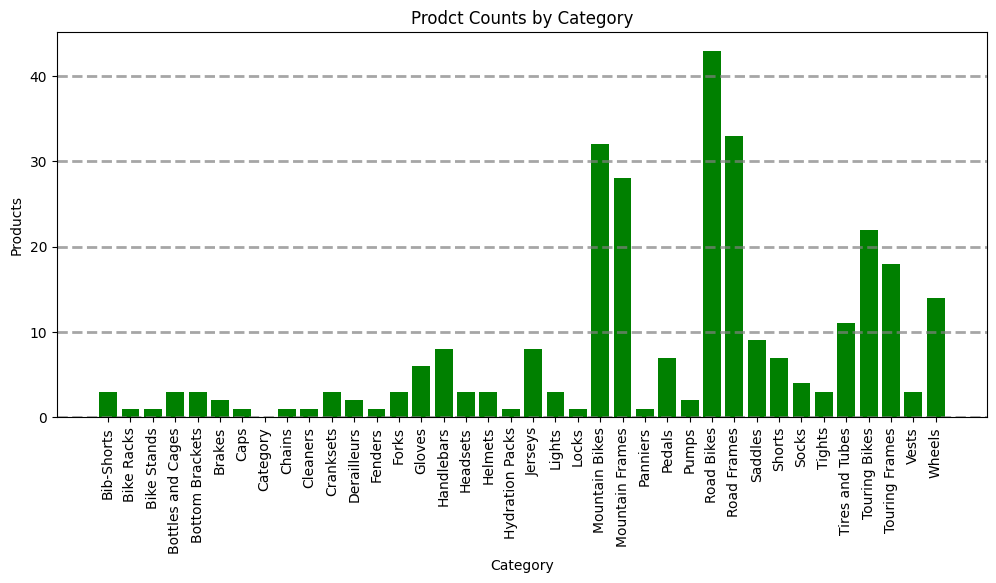

In [118]:
from matplotlib import pyplot as plt

data = spark.sql(
    "SELECT Category, COUNT(ProdID) AS ProdCount FROM products \
                GROUP BY Category \
                ORDER BY Category"
).toPandas()

# clear the plot
plt.clf()

# Create a Fiture
fig = plt.figure(figsize=(12, 5))

# create a bar plot of product counts by category
plt.bar(x=data["Category"], height=data["ProdCount"], color="green")

# customize the chart
plt.title("Prodct Counts by Category")
plt.xlabel("Category")
plt.ylabel("Products")
plt.grid(color="grey", linestyle="--", linewidth=2, axis="y", alpha=0.7)
plt.xticks(rotation=90)

# show the plot
plt.show()

In [125]:
df_sales = spark.read.load("sales.csv", format="csv", header=True)
delta_table_path = "sales"
# df_sales.write.format("delta").save(delta_table_path)

PONIŻEJ NIE DZIALA LOKALNIE

In [ ]:
from delta.tables import *
from pyspark.sql.functions import *

# Create a deltaTable object
deltaTable = DeltaTable.forPath(spark, delta_table_path)

# Update the table (reduce price of accessories by 10%)
deltaTable.update(condition="Category == 'Accessories'", set={"Price": "Price * 0.9"})

In [ ]:
# from pyspark.sql import Row
# Customer = Row("firstName", "lastName", "email", "loyaltyPoints")

# customer_1 = Customer('John', 'Smith', 'john.smith@contoso.com', 15)
# customer_2 = Customer('Anna', 'Miller', 'anna.miller@contoso.com', 65)
# customer_3 = Customer('Sam', 'Walters', 'sam@contoso.com', 6)
# customer_4 = Customer('Mark', 'Duffy', 'mark@contoso.com', 78)

# customers = [customer_1, customer_2, customer_3, customer_4]
# df = spark.createDataFrame(customers)

# df.write.parquet("<path>/customers")

In [ ]:
# Create customer_gold dimension delta table
# DeltaTable.createIfNotExists(spark) \
#     .tableName("sales.dimcustomer_gold") \
#     .addColumn("CustomerName", StringType()) \
#     .addColumn("Email",  StringType()) \
#     .addColumn("First", StringType()) \
#     .addColumn("Last", StringType()) \
#     .addColumn("CustomerID", LongType()) \
#     .execute()

In [84]:
# IT DOES NOT WORK BECAUSE CELL ABOVE
# dfdimCustomer_temp = spark.read.table("Sales.dimCustomer_gold")

# MAXCustomerID = dfdimCustomer_temp.select(coalesce(max(col("CustomerID")),lit(0)).alias("MAXCustomerID")).first()[0]

# dfdimCustomer_gold = dfdimCustomer_silver.join(dfdimCustomer_temp,(dfdimCustomer_silver.CustomerName == dfdimCustomer_temp.CustomerName) & (dfdimCustomer_silver.Email == dfdimCustomer_temp.Email), "left_anti")

# dfdimCustomer_gold = dfdimCustomer_gold.withColumn("CustomerID",monotonically_increasing_id() + MAXCustomerID + 1)

# Display the first 10 rows of the dataframe to preview your data

# display(dfdimCustomer_gold.head(10))

In [ ]:
# deltaTable = DeltaTable.forPath(spark, 'Tables/dimproduct_gold')

# dfUpdates = dfdimProduct_gold

# deltaTable.alias('silver') \
#   .merge(
#         dfUpdates.alias('updates'),
#         'silver.ItemName = updates.ItemName AND silver.ItemInfo = updates.ItemInfo'
#         ) \
#         .whenMatchedUpdate(set =
#         {

#         }
#         ) \
#         .whenNotMatchedInsert(values =
#          {
#           "ItemName": "updates.ItemName",
#           "ItemInfo": "updates.ItemInfo",
#           "ItemID": "updates.ItemID"
#           }
#           ) \
#           .execute()

In [ ]:
# DeltaTable.createIfNotExists(spark) \
#     .tableName("sales.factsales_gold") \
#     .addColumn("CustomerID", LongType()) \
#     .addColumn("ItemID", LongType()) \
#     .addColumn("OrderDate", DateType()) \
#     .addColumn("Quantity", IntegerType()) \
#     .addColumn("UnitPrice", FloatType()) \
#     .addColumn("Tax", FloatType()) \
#     .execute()

In [ ]:
# from pyspark.sql.functions import col

# dfdimCustomer_temp = spark.read.table("Sales.dimCustomer_gold")
# dfdimProduct_temp = spark.read.table("Sales.dimProduct_gold")

# df = df.withColumn("ItemName",split(col("Item"), ", ").getItem(0)) \
#     .withColumn("ItemInfo",when((split(col("Item"), ", ").getItem(1).isNull() | (split(col("Item"), ", ").getItem(1)=="")),lit("")).otherwise(split(col("Item"), ", ").getItem(1))) \


# # Create Sales_gold dataframe

# dffactSales_gold = df.alias("df1").join(dfdimCustomer_temp.alias("df2"),(df.CustomerName == dfdimCustomer_temp.CustomerName) & (df.Email == dfdimCustomer_temp.Email), "left") \
#         .join(dfdimProduct_temp.alias("df3"),(df.ItemName == dfdimProduct_temp.ItemName) & (df.ItemInfo == dfdimProduct_temp.ItemInfo), "left") \
#     .select(col("df2.CustomerID") \
#         , col("df3.ItemID") \
#         , col("df1.OrderDate") \
#         , col("df1.Quantity") \
#         , col("df1.UnitPrice") \
#         , col("df1.Tax") \
#     ).orderBy(col("df1.OrderDate"), col("df2.CustomerID"), col("df3.ItemID"))

# # Display the first 10 rows of the dataframe to preview your data

# display(dffactSales_gold.head(10))

In [ ]:
# from delta.tables import *

# deltaTable = DeltaTable.forPath(spark, 'Tables/factsales_gold')

# dfUpdates = dffactSales_gold

# deltaTable.alias('silver') \
#   .merge(
#     dfUpdates.alias('updates'),
#     'silver.OrderDate = updates.OrderDate AND silver.CustomerID = updates.CustomerID AND silver.ItemID = updates.ItemID'
#   ) \
#    .whenMatchedUpdate(set =
#     {

#     }
#   ) \
#  .whenNotMatchedInsert(values =
#     {
#       "CustomerID": "updates.CustomerID",
#       "ItemID": "updates.ItemID",
#       "OrderDate": "updates.OrderDate",
#       "Quantity": "updates.Quantity",
#       "UnitPrice": "updates.UnitPrice",
#       "Tax": "updates.Tax"
#     }
#   ) \
#   .execute()

In [ ]:
# COPY my_table
# FROM 'https://myaccount.blob.core.windows.net/myblobcontainer/folder0/*.csv,
#     https://myaccount.blob.core.windows.net/myblobcontainer/folder1/'
# WITH (
#     FILE_TYPE = 'CSV',
#     CREDENTIAL=(IDENTITY= 'Shared Access Signature', SECRET='<Your_SAS_Token>')
#     FIELDTERMINATOR = '|'
# )

# COPY INTO test_parquet
# FROM 'https://myaccount.blob.core.windows.net/myblobcontainer/folder1/*.parquet'
# WITH (
#     CREDENTIAL=(IDENTITY= 'Shared Access Signature', SECRET='<Your_SAS_Token>')
# )